# Basic Poisson equation with a time-dependent source term

This example builds on the *basic Poisson equation* example (<a href="poisson_basic.ipynb" target="_blank">Jupyter notebook</a>, <a href="poisson_basic.html" target="_blank">HTML</a>) and is implemented in a Python file <a href="poisson_basic2.py" target="_blank">poisson_basic2.py</a>. It illustrates how to:

- Efficiently solve a linear partial differential equation multiple times
- Assign updated values to `Expression` and `Constant` objects

## Equation and problem definition

The Poisson equation on a unit disk ($R=1$) with  Dirichlet boundary conditions:

<div align="center">    
    $\begin{array}{r c c l}
    \nabla^2 u &=& -f(t) & \text{in } \Omega,\\
    u &=& 0 & \text{on } \Gamma,\\
    \end{array}$    
</div>
where $f(t)=t$.

<div align="center">    
    <img src="figs/poisson_basic_domain.png" style="width: 200px;"/>
</div>

### Weak formulation of the problem

In FEniCS we are solving the weak form of PDE
$$\int_\Omega d{\bf x} \ (\nabla^2 u + f(t)) \ v = 0,$$
where $v$ is an arbitrary *test function* that evaluates to $0$ on the boundary points with prescribed values (Dirichlet boundary conditions). Using the integration by parts, the above equation can be rewritten as 
$$\int_\Omega d{\bf x} \ (-\nabla u \cdot \nabla v + f(t) v) = 0.$$

## Implementation

We import relevant libraries, generate mesh, define function space, impose the Dirichlet boundary conditions, and define the function $u$ and the test function $v$ as was done in the *basic Poisson equation* example (<a href="poisson_basic.ipynb" target="_blank">Jupyter notebook</a>, <a href="poisson_basic.html" target="_blank">HTML</a>).

In [2]:
from __future__ import print_function
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np

# Create mesh
R = 1. # radius
N = 20 # mesh resolution
domain = Circle(Point(0., 0.), R)
mesh = generate_mesh(domain, N)

#define function space
degreeElements = 1
FS = FunctionSpace(mesh, 'Lagrange', degreeElements)

#impose Dirichlet boundary conditions
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(FS, Constant(0.), boundary)

#define function u and test function v
u = Function(FS)
v = TestFunction(FS)

The weak formulation of the problem, where we introduced the time-dependent source term $f(t)$ via the `Expression`

In [11]:
# weak formulation of the problem
f = Expression('t', degree=1, t=0.)
Res = -dot(grad(u), grad(v))*dx + f*v*dx

To solve the problem multiple times, we just need to update the value of the object `f` and we don't need to redefine the residual `Res`. This is because the residual `Res` is linked to the object `f`. Thus it is important that we update the value of the object `f` rather than creating a new object `f`.

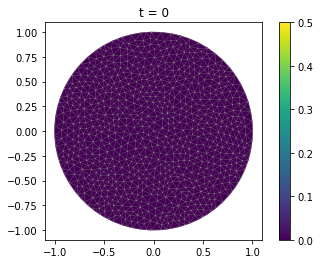

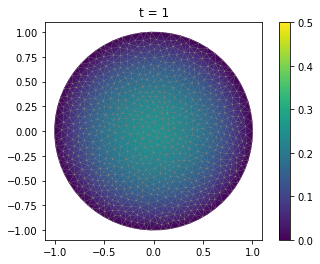

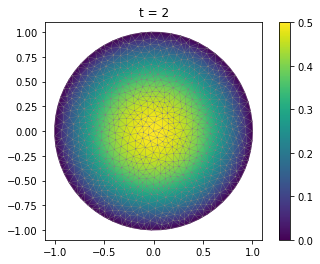

In [12]:
for t in range(0,3):
    # update the value of the source term
    f.t=t

    # solve the problem
    solve(Res == 0, u, bc)

    # plot solution
    c = plot(u,mode='color',title='t = '+str(t),vmin=0,vmax=0.5)
    plt.colorbar(c)
    plot(mesh,linewidth=0.3)
    plt.show()

Since the source term $f(t)$ has no spatial dependence, we can also use the `Constant` function class to achieve the same result.

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


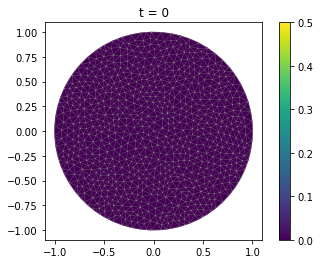

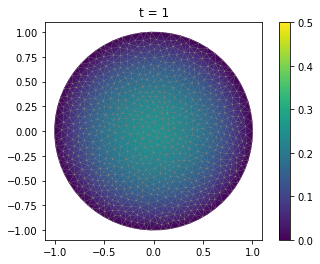

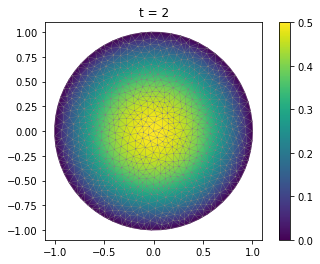

In [13]:
# weak formulation of the problem
f = Constant(0.)
Res = -dot(grad(u), grad(v))*dx + f*v*dx

for t in range(0,3):
    # update the value of the source term
    f.assign(Constant((t)))

    # solve the problem
    solve(Res == 0, u, bc)

    # plot solution
    c = plot(u,mode='color',title='t = '+str(t),vmin=0,vmax=0.5)
    plt.colorbar(c)
    plot(mesh,linewidth=0.3)
    plt.show()

## Complete code

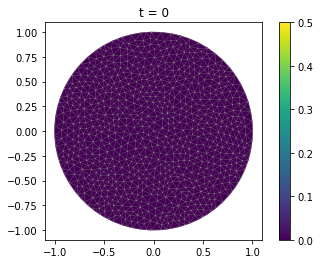

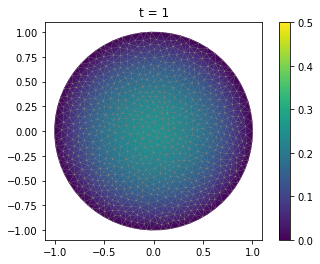

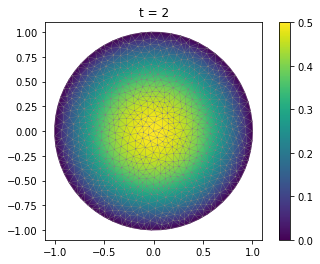

In [14]:
from __future__ import print_function
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np

# Create mesh
R = 1. # radius
N = 20 # mesh resolution
domain = Circle(Point(0., 0.), R)
mesh = generate_mesh(domain, N)

#define function space
degreeElements = 1
FS = FunctionSpace(mesh, 'Lagrange', degreeElements)

#impose Dirichlet boundary conditions
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(FS, Constant(0.), boundary)

#define function u and test function v
u = Function(FS)
v = TestFunction(FS)

# weak formulation of the problem
f = Expression('t', degree=1, t=0.)
#f = Constant(0.)
Res = -dot(grad(u), grad(v))*dx + f*v*dx

for t in range(0,3):
    # update the value of the source term
    f.t=t
#    f.assign(Constant((t)))

    # solve the problem
    solve(Res == 0, u, bc)

    # plot solution
    c = plot(u,mode='color',title='t = '+str(t),vmin=0,vmax=0.5)
    plt.colorbar(c)
    plot(mesh,linewidth=0.3)
    plt.show()